In [56]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

In [3]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"


In [4]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
# Cleaning city data ---------

# 1. Get rows containing null values
# 2. Ensure consistent data types across columns
# 3. Find out total data points in each city



In [7]:
# 1. Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [8]:
# 1. Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [9]:
# 1. No null values seen in our dataset!

In [10]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [11]:
# Get the unique values of the type of city.
# Returns an array of the unique values in the "type" column using the .unique() method
city_data_df["type"].unique()


array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [12]:
# Get the number of data points from the Urban cities.
print(sum(city_data_df["type"]=="Urban"))

# Get the number of data points from the Rural cities.
print(sum(city_data_df["type"]=="Rural"))

# Get the number of data points from the Suburban cities.
print(sum(city_data_df["type"]=="Suburban"))

66
18
36


In [13]:
# Cleaning the ride_data dataframe -------------

# 1. Get all rows containing null values
# 2. Make sure fare and ride_id columns are numerical data types and not string/objects

# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [14]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [15]:
# No null values found in our dataset

In [16]:
# Get the data types of each column.
ride_data_df.dtypes


city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [17]:
# Fare is a float, as expected. Ride ID is an integer, also as expected

In [18]:
# Merging/Joining our dataframes ----------

# Since the city column is common between both dataframes, we will merge them on this column
# the on= parameter takes a list with the column names of the left dataframe, then the right dataframe. 
# If we wanted to merge on two columns with differently named column names, we would change them in the appropriate side
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [19]:
# Creating a bubble chart plotting total number of rides (per city) against the average fare, with driver count per city reflected in bubble size

# To do this, we need to find the following metrics:
    # 1. Avg fare for each city
    # 2. Total number of rides for each city type
    # 3. Size of marker/bubble correspond to # of drivers in city

# Since we're working with three city types (urban, suburban, rural), it would be efficient to split our dataframe into three sub dataframes to run analyses on

# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [20]:
# To find the # of rides per city (X-axis), we need to use a function to count the # of each city

# We can use the groupby() function to set the index to the city and the ride_id to be the count() of ride_ids associated
# Remember to use groupby() we should also use a mathematical function; otherwise this will just return groupby object
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [21]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [22]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [23]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]


In [24]:
# Getting the average number of drivers for each city in each dataset

# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]

# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]


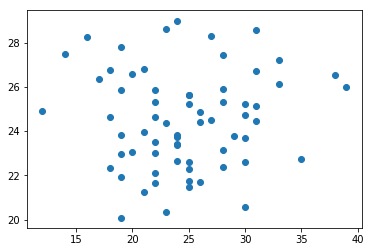

In [25]:
# Assembling the Bubble Chart (Matlab method) ------------

# x-axis: # of rides for each city
# y-axis: average fare for each city
# marker size: average # drivers in each city

# Create our Urban Cities plot:
plt.scatter(urban_ride_count, urban_avg_fare)

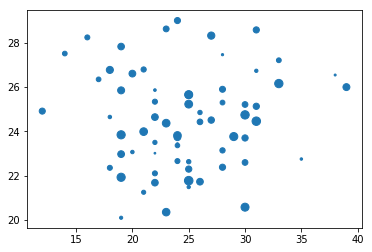

In [26]:
# Adjust the size of the markers in our scatter plot:
# Pass in the urban_driver_count for the size of the marker argument s=

plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=urban_driver_count)

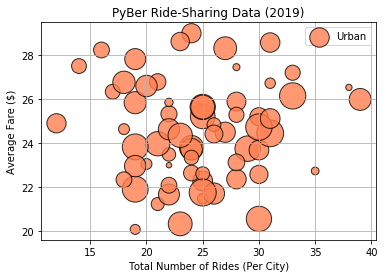

In [27]:
# Enhance the readability by:
#   1. increasing the size of markers by a factor of 10
#   2. giving markers a black edgecolor/outline
#   3. setting their transparency (alpha) to 80%
#   4. Assigning labels and gridlines 

# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

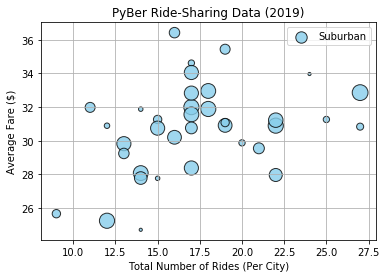

In [28]:
# Creathe suburban city ubble chart:

# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

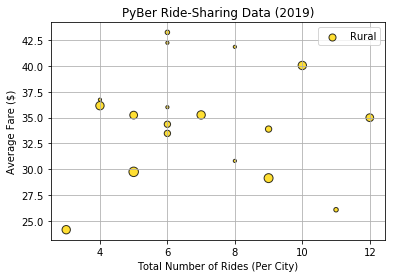

In [29]:
# Create the rural cities bubble chart:

# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

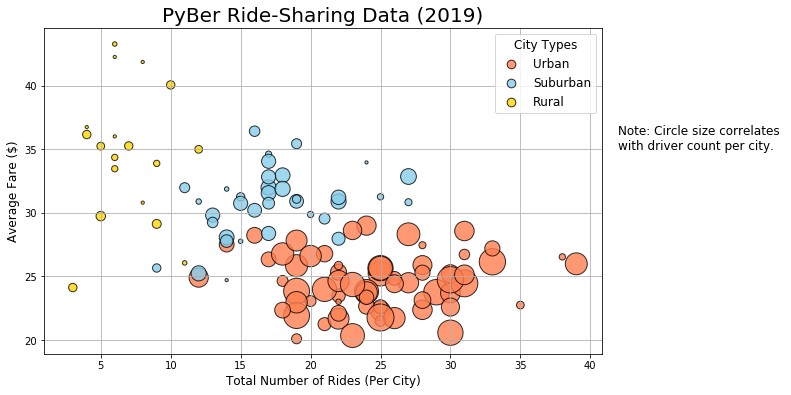

In [30]:
# Creating a COMBINED bubble chart with the above data

# Since Jupyter Notebook executes code on a per-cell basis, in order to combine plots, we can plot them all in a single cell:

# Add the scatter charts for each type of city.
# Edit subplot size to be bigger, rectangular shape
# Notice xlimit does not need to be manually set, but instead is automatically expanded based off the data plotted
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Add labels, title, and gridlines
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend. Notice that by automatically plotting the legend, it scales marker size based off the average value of data in that series
# We need to correct this by scaling the legend to the the same size and adding som other parameters

# Create a legend:
# Assign fontsize to standard 12pt font. Expanded mode expands the legend box. 
# Scaterpoints = 1 assigns the number of markers to present each series (2 = 2 circles)
# Loc=best sets the location to be the best location based off the nature of data in the plot
lgnd = plt.legend(fontsize="12", mode="Expanded",
        scatterpoints=1, loc="best", title="City Types")
# We access the first, second, and third legendHandle  of the legend object lgnd, and access the underscore property _sizes
# We assign them all to be a uniform value of 75
# This is a hack -- look into this further. The PROBLEM HERE IS ENSURING CONSISTENT SIZE OF MARKERS, INSTEAD OF RELATIVE      
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Add text describing the meaning of varying bubble sizes in the chart
# plt.text takes coordinates as first and second arguments, the text as the third
# subsequent arguments define the parameters of the message (like fontsize)
plt.text(42, 35, "Note: Circle size correlates \nwith driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")

# Show the plot
plt.show()


In [31]:
# Producing summary statistics:

# Get summary statistics.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [32]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [33]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [37]:
# Get summary statistics.
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [47]:
#
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)


(24.62, 17.36, 6.94)

In [49]:
# We can just access the mean without getting all the summary statistics by using mean() instead of describe()

# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

# The result is a tuple of the means of the ride_count dataframes, rounded to 2 decimal places
# We can access these with tuple unpacking also!

(24.62, 17.36, 6.94)

In [50]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [55]:
# Calculate the mode of the ride count for each city type.
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64, 0    17
 dtype: int64, 0    6
 dtype: int64)

In [59]:
# We can also use NumPy or SciPy (specifically scipy.stats) to also calculate Central Tendency

# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

# Note mode is taken from SciPy Stats, not NumPy
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

# -------------------

# Gather the same descriptive data for rural and suburban cities

mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).
The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).
The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [64]:
# Now that we have ride counts, let's look to average fare per city type: ----------------

# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

# Get fares for suburban and rural cities:
rural_fares = rural_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]

In [65]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [66]:
# Calculate central tendency for rural cities

mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [67]:
# Calculate central tendency for subsuburban cities

mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [75]:
# Getting the number of drivers per city type, as well as descriptive statistics on this; use driver_count

# Get the driver count data from the urban, rural, and suburban cities.
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

mean_driver_count = np.mean(urban_drivers)
print(f"The mean driver count in urban cities is {mean_driver_count:.1f}")
median_driver_count = np.median(urban_drivers)
print(f"The median driver count in urban cities is {median_driver_count:.1f}")
mode_driver_count = sts.mode(urban_drivers)
print(f'The mode driver count in urban cities is {mode_driver_count}')

The mean driver count in urban cities is 36.7
The median driver count in urban cities is 37.0
The mode driver count in urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86]))


In [76]:
# get the driver count descriptive stats for rural cities

mean_driver_count = np.mean(rural_drivers)
print(f"The mean driver count in rural cities is {mean_driver_count:.1f}")
median_driver_count = np.median(rural_drivers)
print(f"The median driver count in rural cities is {median_driver_count:.1f}")
mode_driver_count = sts.mode(rural_drivers)
print(f'The mode driver count in rural cities is {mode_driver_count}')

The mean driver count in rural cities is 4.3
The median driver count in rural cities is 4.0
The mode driver count in rural cities is ModeResult(mode=array([1], dtype=int64), count=array([32]))


In [77]:
# get the driver count descriptive stats for suburban cities

mean_driver_count = np.mean(suburban_drivers)
print(f"The mean driver count in suburban cities is {mean_driver_count:.1f}")
median_driver_count = np.median(suburban_drivers)
print(f"The median driver count in suburban cities is {median_driver_count:.1f}")
mode_driver_count = sts.mode(suburban_drivers)
print(f'The mode driver count in suburban cities is {mode_driver_count}')

The mean driver count in suburban cities is 13.7
The median driver count in suburban cities is 16.0
The mode driver count in suburban cities is ModeResult(mode=array([20], dtype=int64), count=array([79]))


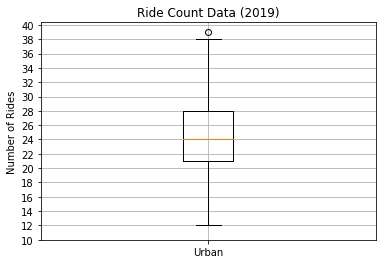

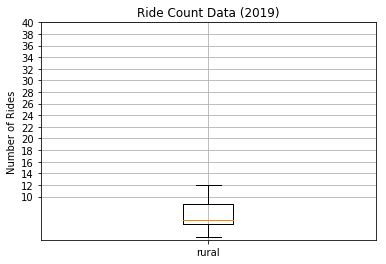

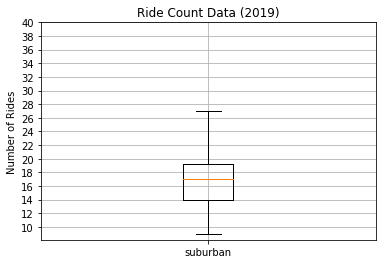

In [79]:
# Plotting descriptive statistics with Box-And-Whisker plots: --------------
# Box and whisker plots can highlight outliers in our data set
# We will use the Object Oriented Programming OOP method to create this plot

# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()

# Create a box-and-whisker plot for the rural cities ride count.
x_labels = ["rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()

# Create a box-and-whisker plot for the suburban cities ride count.
x_labels = ["suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()

plt.show()

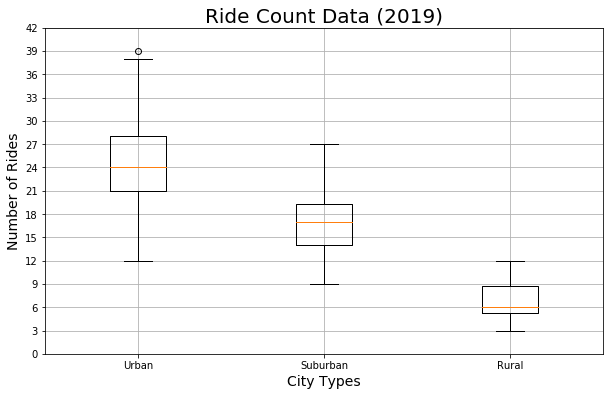

In [80]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
# By passing in three different lists correspodning to each dataset, we can plot all three box-whisker plots on a single plot
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [84]:
# Finding the outlier city; we know that the outlier's rider count is equal to 39. We can access this city using a conditional statement on the original urban_ride_count dataframe

# Get the city that matches 39.
# We access the first value of the Series result (city+ride_count) by using the .index[0] method on the Series object
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


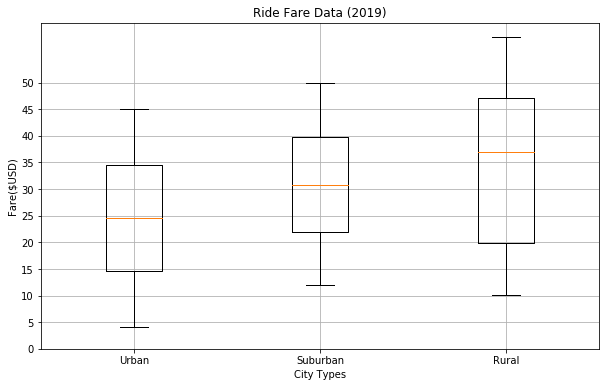

Summary Statistics


<Figure size 432x288 with 0 Axes>

In [89]:
# Box and whisker plots for ride fare data:

# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban", "Suburban", "Rural"]
fig, ax = plt.subplots(figsize=(10, 6))
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
ax.boxplot(ride_fare_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.set_xlabel('City Types')
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

# Save the figure.
plt.savefig("analysis/Fig3.png")

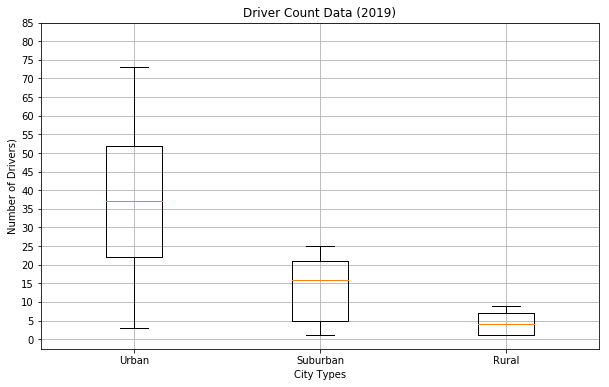

Summary Statistics


<Figure size 432x288 with 0 Axes>

In [96]:
# Create a box whisker plot for driver count data

# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban", "Suburban", "Rural"]
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(driver_count_data,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.set_xlabel('City Types')
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

# Save our figure as fig 4
plt.savefig('analysis/Fig4.png')